In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import sympy as sp 

from numpy.linalg import inv
from numpy import cos, sin

In [2]:
u, x1, x2 = sp.symbols('u,x1,x2')
w1, w2, w3, w4, w5 = sp.symbols('w_1,w_2,w_3,w_4,w_5')
DTA, _thetad = sp.symbols('Delta,\\theta_{d}')

In [3]:
g = 9.81
L = 1 
delta = 0.01
tf = 20
time = np.arange(0, tf , delta)
thetad = np.pi/6

alpha = 0.01
beta = 1
gamma = 0.9
R = np.array([0.05]).reshape(1,)
Q = np.eye(2)

_phi = sp.Matrix([x1, x2, x1**2, x1*x2, x2**2])
display(_phi)

_phi_der = sp.zeros(len(_phi), 2)
_phi_der[:, 0] = sp.diff(_phi, x1)
_phi_der[:, 1] = sp.diff(_phi, x2)
display(_phi_der)

_fx = sp.Matrix([[x1 + DTA*x2], [x2 + DTA*(g/L*(sp.sin(_thetad) - sp.sin(_thetad + x1)))]])
display(_fx)

NL = 5

Matrix([
[   x1],
[   x2],
[x1**2],
[x1*x2],
[x2**2]])

Matrix([
[   1,    0],
[   0,    1],
[2*x1,    0],
[  x2,   x1],
[   0, 2*x2]])

Matrix([
[                                                Delta*x2 + x1],
[Delta*(9.81*sin(\theta_{d}) - 9.81*sin(\theta_{d} + x1)) + x2]])

In [4]:
np.sin(np.pi/6)

0.49999999999999994

## Working?

In [5]:
g = 9.81
L = 1 
DELTA = 0.01
thetad = np.pi/6
tf = 20
NN = tf/DELTA
alpha = 0.01
beta = 1
gamma = 0.9
Q = np.eye(2)
R = np.array([0.05]).reshape(1,)
NL = 5

In [6]:
uk, x1k, x2k = sp.symbols('u_k,x_{1}(k),x_{2}(k)')
w1, w2, w3, w4, w5 = sp.symbols('w_1,w_2,w_3,w_4,w_5')

phi = sp.Matrix([x1k, x2k, x1k**2, x1k*x2k, x2k**2])
phi_func = sp.lambdify([x1k, x2k], phi)

phi_der = sp.zeros(len(sp.diff(phi, x1k)), 2)
phi_der[:, 0] = sp.diff(phi, x1k) 
phi_der[:, 1] = sp.diff(phi, x2k) 
phi_der
phi_der_func = sp.lambdify([x1k, x2k], phi_der)

X = sp.Matrix([x1k, x2k])
X_func = sp.lambdify([x1k, x2k], X)

W = sp.Matrix([w1, w2, w3, w4, w5])
W_func = sp.lambdify([w1, w2, w3, w4, w5], W)

fx = sp.Matrix([[x1k + DELTA*x2k], [x2k + DELTA*(g*(0.5 - sp.sin(sp.pi/6 + x1k)))]])
fx_func = sp.lambdify([x1k, x2k], fx)

gx = np.array([0, DELTA]).reshape(-1,1)

rx = X.T@Q@X + (R*uk**2).reshape(1,1)
rx_func = sp.lambdify([x1k, x2k, uk], rx)

u_j = (-gamma/2*inv(R.reshape(-1,1)).reshape(R.shape))[0]*gx.T@phi_der.T@W
uj_func = sp.lambdify([x1k, x2k, w1, w2, w3, w4, w5], u_j)

In [7]:
display(phi)
display(phi_der)
display(X)
display(fx)
display(gx)
display(rx)
display(u_j)

Matrix([
[         x_{1}(k)],
[         x_{2}(k)],
[      x_{1}(k)**2],
[x_{1}(k)*x_{2}(k)],
[      x_{2}(k)**2]])

Matrix([
[         1,          0],
[         0,          1],
[2*x_{1}(k),          0],
[  x_{2}(k),   x_{1}(k)],
[         0, 2*x_{2}(k)]])

Matrix([
[x_{1}(k)],
[x_{2}(k)]])

Matrix([
[                        x_{1}(k) + 0.01*x_{2}(k)],
[x_{2}(k) - 0.0981*sin(x_{1}(k) + pi/6) + 0.04905]])

array([[0.  ],
       [0.01]])

Matrix([[0.05*u_k**2 + 1.0*x_{1}(k)**2 + 1.0*x_{2}(k)**2]])

Matrix([[-0.09*w_2 - 0.09*w_4*x_{1}(k) - 0.18*w_5*x_{2}(k)]])

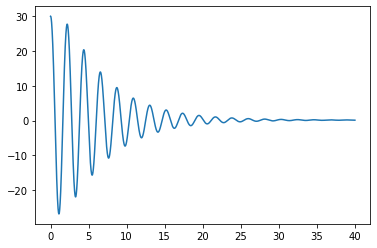

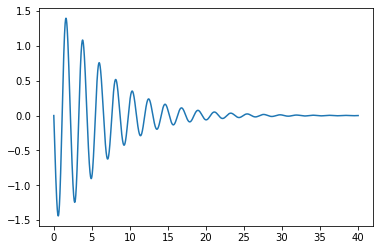

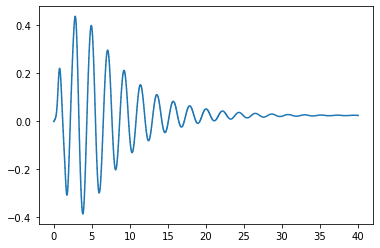

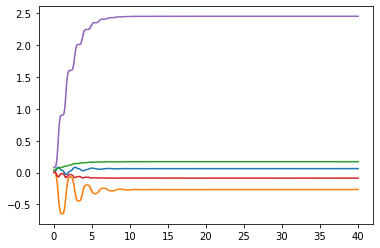

In [12]:
kt = 0
time = np.array([0]).reshape(-1,)
X_vals = X_func(np.pi/6, 0)
W_vals =  W_func(0.1*np.random.rand(),
                 0.1*np.random.rand(),
                 0.1*np.random.rand(),
                 0.1*np.random.rand(),
                 0.1*np.random.rand())
uj = uj_func(X_vals[0], 
              X_vals[1], 
              W_vals[0], 
              W_vals[1],
              W_vals[2],
              W_vals[3],
              W_vals[4]).reshape(-1,)
u_vals = uj
while kt < 2*NN:
    X_vals = np.concatenate((X_vals, 
                            (fx_func(X_vals[:,-1][0], X_vals[:,-1][1]) + gx*uj).reshape(-1,1)), axis=1)

    kt += 1
    time = np.concatenate((time, 
                           np.array([kt*DELTA])))
    phi_lop = phi_func(X_vals[:,-2][0], X_vals[:,-2][1])
    val_approx = rx_func(X_vals[:,-2][0], X_vals[:,-2][1], u_vals[-1]) + gamma*phi_func(X_vals[:,-1][0], X_vals[:,-1][1]).T@W_vals[:,-1]
    Wji = W_vals[:, -1].reshape(-1,1)
    uj = u_vals[-1].reshape(-1,1)
    Wj = Wji
    count = 1
    
    while False if count > 1 and np.sqrt((Wjim-Wji).T@(Wjim-Wji)) else True and count < 1000:
        Wjim = Wji
        Wji = Wji - alpha*phi_lop@(phi_lop.T@Wji - val_approx)
        W_vals = np.concatenate((W_vals, 
                                 (Wji).reshape(-1,1)), axis=1)
        X_vals = np.concatenate((X_vals, 
                                (fx_func(X_vals[:,-1][0], X_vals[:,-1][1]) + gx*uj).reshape(-1,1)), axis=1)
        kt += 1
        time = np.concatenate((time,
                              (np.array([kt*DELTA]))))
        uj = uj_func(X_vals[:,-1][0], X_vals[:,-1][1], Wj[0], Wj[1], Wj[2], Wj[3], Wj[4]).reshape(-1,)
        u_vals = np.concatenate((u_vals, uj))
        phi_lop = phi_func(X_vals[:,-2][0], X_vals[:,-2][1])
        val_approx = rx_func(X_vals[:,-2][0], X_vals[:,-2][1], u_vals[-1]) + gamma*phi_func(X_vals[:,-1][0], X_vals[:,-1][1]).T@Wj
        count += 1
        
    W_vals = np.concatenate((W_vals, 
                            Wji), axis=1)
    uj = uj_func(X_vals[:,-1][0], X_vals[:,-1][1], Wj[0], Wj[1], Wj[2], Wj[3], Wj[4]).reshape(-1,)
    u_vals = np.concatenate((u_vals, uj))
    
plt.plot(time, np.rad2deg(X_vals[0, :]))
plt.show()

plt.plot(time, X_vals[1, :])
plt.show()

plt.plot(time, u_vals)
plt.show()

for i in W_vals:
    plt.plot(time, i)
plt.show()

In [9]:
W_vals.shape

(5, 4001)

In [13]:
0.1*np.random.rand()

0.048833135483486

In [14]:
0.1*np.random.rand()

0.0013355711714772012

In [15]:
0.1*np.random.rand()

0.08050476735448009